# Лабораторная работа 1. Введение в PyTorch

### Содержание
1. [Установка](#Установка)
1. [Тензоры](#Тензоры)
1. [Автоматическое дифференцирование](#Автоматическое-дифференцирование)
1. [Линейная регрессия в PyTorch](#Линейная-регрессия-в-PyTorch)
1. [Линейная классификация в PyTorch](#Линейная-классификация-в-PyTorch)

### Установка
Чтобы установить PyTorch, нужно на [официальном сайте](https://pytorch.org/get-started/locally/) сгенерировать команду для установки в зависимости от версии операционной системы и других параметров.  
Рекомендуется также установить [CUDA](https://developer.nvidia.com/cuda-zone) (Compute Unified Device Architecture) – вычислительную платформу от Nvidia для поддержки вычислений на видеокартах и [CuDNN](https://developer.nvidia.com/cudnn) (CUDA Deep Neural Network) – библиотеку на основе CUDA для поддержки глубоких нейронных сетей.  
Проверить правильность установки и узнать версии используемого ПО можно следующим образом:

In [71]:
import torch
import sys

In [72]:
# Утилита от Nvidia для вывода информации о видеокарте
!nvidia-smi

"nvidia-smi" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [73]:
print('Python VERSION:', sys.version)
print('\npyTorch VERSION:', torch.__version__)
print('\nCUDA VERSION:')
! nvcc --version
print('\nCUDNN VERSION:', torch.backends.cudnn.version())
print('\nNumber CUDA Devices:', torch.cuda.device_count())
print('Current cuda device:', torch.cuda.current_device())
print('Cuda device name: ', torch.cuda.get_device_name(0))

Python VERSION: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]

pyTorch VERSION: 1.8.1+cu102

CUDA VERSION:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:04_Central_Daylight_Time_2018
Cuda compilation tools, release 10.0, V10.0.130

CUDNN VERSION: 7605

Number CUDA Devices: 1
Current cuda device: 0
Cuda device name:  NVIDIA GeForce GTX 1050 Ti


---
Проверить доступность CUDA можно также следующим образом:

In [74]:
torch.cuda.is_available()

True

### Тензоры
*Тензор* – многомерный массив данных в библиотеках глубокого обучения. Тензор может быть 0-мерным (скаляр), одномерным (вектор), двумерным (матрица) или размерностью больше двух.  
Тензоры используются для представления входов, выходов и параметров моделей.

#### Инициализация тензоров
Тензоры могут быть инициализированы несколькими способами.

1. На основе данных:

In [75]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Из массивов NumPy:

In [76]:
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

3. Заполненные случайным образом или константными значениями:

In [77]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor: \n {rand_tensor} \n')
print(f'Ones Tensor: \n {ones_tensor} \n')
print(f'Zeros Tensor: \n {zeros_tensor}')

Random Tensor: 
 tensor([[0.7025, 0.6790, 0.9155],
        [0.2418, 0.1591, 0.7653]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Атрибуты тензоров
Тензоры имеют несколько атрибутов, в том числе:

In [78]:
tensor = torch.rand(3, 4)
print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on the following device: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on the following device: cpu


#### Операции над тензорами
По умолчанию тензоры создаются на CPU.  
Чтобы переместить их на GPU нужно вызвать метод `to`:

In [79]:
print(f'Tensor is stored on: {tensor.device}')
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f'Tensor is stored on: {tensor.device}')

Tensor is stored on: cpu
Tensor is stored on: cuda:0


---
Индексирование и срезы (slicing):

In [80]:
tensor = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(f'Initial tensor:\n{tensor}\n')
print(f'First row: {tensor[0]}\n')
print(f'First column: {tensor[:, 0]}\n')
print(f'Last column: {tensor[..., -1]}\n')
tensor[:,1] = 0
print(tensor)

Initial tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

First row: tensor([1, 2, 3, 4])

First column: tensor([1, 5, 9])

Last column: tensor([ 4,  8, 12])

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])


---
Конкатенация:

In [81]:
concat_tensor = torch.cat([tensor, tensor, tensor], dim=1)
print(concat_tensor)

tensor([[ 1,  0,  3,  4,  1,  0,  3,  4,  1,  0,  3,  4],
        [ 5,  0,  7,  8,  5,  0,  7,  8,  5,  0,  7,  8],
        [ 9,  0, 11, 12,  9,  0, 11, 12,  9,  0, 11, 12]])


---
Арифметические операции:

In [82]:
shape = (3, 3)
tensor1 = torch.ones(shape)
tensor2 = torch.ones(shape)
tensor_sum = tensor1 + tensor2
print(f'tensor1 + tensor2 = \n{tensor_sum}\n')
tensor_mul1 = tensor1 @ tensor2
print(f'tensor1 @ tensor2 = \n{tensor_mul1}\n')
tensor_mul2 = torch.matmul(tensor1, tensor2)
print(f'torch.matmul(tensor1, tensor2) = \n{tensor_mul2}\n')
tensor_mul3 = tensor1 * tensor2
print(f'tensor1 * tensor2 = \n{tensor_mul3}\n')

tensor1 + tensor2 = 
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

tensor1 @ tensor2 = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

torch.matmul(tensor1, tensor2) = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

tensor1 * tensor2 = 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])



---
Тензор может состоять из одного элемента (скаляр). В этом случае для доступа к значению тензора можно воспользоваться методом `item`:

In [83]:
summa = tensor.sum()
print(f'summa = {summa}, type(summa): {type(summa)}\n')
print(f'summa.item() = {summa.item()}, type(summa.item()): {type(summa.item())}')

summa = 60, type(summa): <class 'torch.Tensor'>

summa.item() = 60, type(summa.item()): <class 'int'>


---
Операции `in-place` – это операции, результат которых сохраняется в самом операнде. Обозначаются суфиксом `_`:

In [84]:
print(f'{tensor}\n')
tensor.add_(5)
print(tensor)

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])

tensor([[ 6,  5,  8,  9],
        [10,  5, 12, 13],
        [14,  5, 16, 17]])


### Автоматическое дифференцирование

Для настройки весов в нейронных сетях используется *алгоритм обратного распространения ошибки* (back propagation). В этом алгоритме веса изменяются в зависимости от градиента функции ошибки.  
В PyTorch модуль `torch.autograd` отвечает за автоматическое дифференцирование на вычислительном графе.  

Рассмотрим сигмоидальную функцию и её производную:
$$\sigma(u)=\frac{1}{1+e^{-u}}$$
  
$$\sigma'(u)=\frac{e^{-u}}{(1+e^{-u})^2}=\frac{1}{(1+e^{-u})}\frac{e^{-u}}{(1+e^{-u})}=\frac{1}{(1+e^{-u})}\frac{(1+e^{-u})-1}{(1+e^{-u})}=\sigma(u)(1-\sigma(u))$$

Зададим эти функции в PyTorch и нарисуем их графики:

In [85]:
def sigmoid(u):
    return 1 / (1 + torch.exp(-u))

In [86]:
def sigmoid_deriv(u):
    return sigmoid(u) * (1 - sigmoid(u))

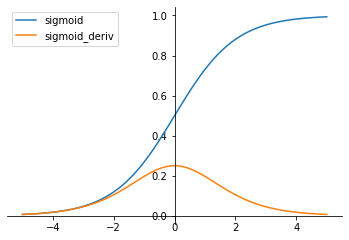

In [87]:
import matplotlib.pyplot as plt
x = torch.tensor(np.linspace(-5, 5, 100))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, sigmoid_deriv(x), label='sigmoid_deriv')
ax.legend()
plt.show()

Зададим тензор, для которого мы хотели бы найти градиент (параметр `requires_grad=True`):

In [88]:
u = torch.tensor(0.0, requires_grad=True)
u

tensor(0., requires_grad=True)

Зададим тензор, которому присвоим значение функции 

In [89]:
s = sigmoid(u)
s

tensor(0.5000, grad_fn=<MulBackward0>)

В атрибуте `grad_fn` хранится ссылка на функцию, которая была использована для вычисления тензора.  
В случае задания тензора пользователем – `grad_fn = None`:

In [90]:
print(f'u.grad_fn: {u.grad_fn}\n')
print(f's.grad_fn: {s.grad_fn}\n')
a = u + u
print(f'(u+u).grad_fn: {a.grad_fn}\n')
a = u - u
print(f'(u-u).grad_fn: {a.grad_fn}\n')
a = u * u
print(f'(u*u).grad_fn: {a.grad_fn}\n')
a = u / u
print(f'(u/u).grad_fn: {a.grad_fn}\n')
a = 1 / u
print(f'(1/u).grad_fn: {a.grad_fn}\n')
a = torch.mean(u)
print(f'mean(u).grad_fn: {a.grad_fn}')

u.grad_fn: None

s.grad_fn: <MulBackward0 object at 0x0000014F42BA3748>

(u+u).grad_fn: <AddBackward0 object at 0x0000014F42CC8A90>

(u-u).grad_fn: <SubBackward0 object at 0x0000014F42CC8A90>

(u*u).grad_fn: <MulBackward0 object at 0x0000014F42CC8A90>

(u/u).grad_fn: <DivBackward0 object at 0x0000014F42BA3F98>

(1/u).grad_fn: <MulBackward0 object at 0x0000014F42BA3F98>

mean(u).grad_fn: <MeanBackward0 object at 0x0000014F42CC8A90>


---
Для вычисления градиента необходимо вызвать метод `backward`:

In [91]:
s.backward()

Значение градиента после вызова `backward` хранится в атрибуте `grad`:

In [92]:
u.grad

tensor(0.2500)

Проверим, что значение градиента (производной) совпадает со значением, вычисленным аналитически:

In [93]:
sigmoid_deriv(u)

tensor(0.2500, grad_fn=<MulBackward0>)

Обратите внимание, что повторный вызов метода `backward` невозможен:

In [94]:
# Раскомментируйте эту строку
#s.backward()

Для того, чтобы повторно вызывать метод `backward`, следует указать при его вызове параметр `retain_graph=True`. Но имейте в виду, что в этом случае значение градиента будет накапливаться:

In [95]:
a = torch.tensor(2.0, requires_grad=True)
b = a * a * a
b.backward(retain_graph=True)
print(f'a.grad = {a.grad}')
b.backward(retain_graph=True)
print(f'a.grad = {a.grad}')
b.backward()
print(f'a.grad = {a.grad}')

a.grad = 12.0
a.grad = 24.0
a.grad = 36.0


При необходимости градиенты можно обнулить:

In [96]:
u.grad.data.zero_()
u.grad

tensor(0.)

**Задание**. Проверьте значения производной сигмоидальной функции, вычисленные в разных точках. Сравните их со значениями на графике функций.

In [97]:
t = torch.tensor(2.0, requires_grad=True) # создаем тензор
f = sigmoid(t)
f.backward(retain_graph=True) # вычисляем градиент
print(f'{t.grad}')
print(f'{sigmoid_deriv(t)}')

0.10499356687068939
0.10499362647533417


---
Отметим, что в PyTorch, конечно, имеется [своя реализация](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) сигмоидальной функции.

**Задание**. Посчитайте значения градиента при помощи сигмоидальной функции из PyTorch.

In [98]:
t = torch.tensor(-2.0, requires_grad=True) # создаем тензор
sig = torch.nn.Sigmoid()
f = sig(t)
f.backward(retain_graph=True) # вычисляем градиент
print(f'{t.grad}')
print(f'{sigmoid_deriv(t)}')

0.10499358177185059
0.10499358177185059


*Замечание*. Мы можем найти градиенты только для листьев в графе вычислений.

#### Приостановка отслеживания градиентов
По умолчанию, PyTorch отслеживает историю вычислений и поддерживает вычисление градиентов для тензоров, у которых установлено `requires_grad=True`.  
Однако иногда бывает необходимо приостановить отслеживание, например, когда сеть уже обучена и требуется выполнять только прямой проход или когда в процессе обучения сети нужно зафиксировать веса определенных слоев. В этом случае можно воспользоваться блоком `no_grad` или методом `detach()`:

In [99]:
s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

with torch.no_grad():
    s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

s.requires_grad = True
s.requires_grad = False


In [100]:
s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

s = s.detach()
print(f's.requires_grad = {s.requires_grad}')

s.requires_grad = True
s.requires_grad = False


### Линейная регрессия в PyTorch

#### Создание модели
Построим однослойную сеть, состоящую из одного нейрона, которая аналогична обычной линейной регрессии.

Пространство имен `nn` в PyTorch предоставляет все необходимые блоки для построения нейронных сетей.  
Каждый модуль наследует классу [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Нейронная сеть представляет собой также модуль, который содержит другие модули (слои).

In [101]:
from torch import nn

Определим устройство, на котором будем обучать сеть:

In [102]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using "{}" device'.format(device))

Using "cuda" device


Опишем класс нашей нейронной сети (который должен являться наследником `nn.Module`):

In [103]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.regr = nn.Linear(1, 1)

    def forward(self, x):
        y = self.regr(x)
        return y

Метод `__init__` является конструктором класса.  
В первой строке конструктора вызывается конструктор базового класса `nn.Module`.  
Во второй строке создается единственный слой, содержащий один нейрон, с помощью модуля [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).  
Данный модуль осуществляет линейное преобразование входа $\vec{x}$ в выход $\vec{y}$ с учетом матрицы весов $W$:  

$$\vec{y}=\vec{x}W^T+\vec{b}.$$

Первый аргумент для `Linear` – `in_features` – количество входов $x$, второй `out_features` – количество выходов $y$ (фактически, количество нейронов в данном слое). Существует также третий аргумент – `bias`, определяющий наличие вектора свободных коэффициентов $\vec{b}$ (по умолчанию `bias=True`).  
Матрица весов $W$ будет иметь размерность (`out_features`, `in_features`), вектор свободных коэффициентов $\vec{b}$ – (`out_features`).  
Значения $W$ и $\vec{b}$ инициализируются случайным образом из равномерного распределения $U(-\sqrt{k},\sqrt{k})$, где $k=\frac{1}{in\_features}$.

Заметим, что атрибут `requires_grad` для тензоров-весов сети автоматически устанавливается в `True`.

Метод `forward` определяет поток данных через нашу сеть (*прямой проход*). Аргумент `x` – это входные данные для сети. В нашем примере к `x` применяется линейное преобразование, результат которого является выходом сети (линейная регрессия).

---
Инициализируем генератор случайных чисел PyTorch для воспроизводимости результатов (для одинаковых начальных значений весов):

In [104]:
torch.manual_seed(42)

Создаем экземпляр класса `NeuralNetwork` и выводим структуру сети:

In [105]:
model = NeuralNetwork()
model

NeuralNetwork(
  (regr): Linear(in_features=1, out_features=1, bias=True)
)

---
Перемещаем сеть на GPU:

In [106]:
model.to(device)

NeuralNetwork(
  (regr): Linear(in_features=1, out_features=1, bias=True)
)

---
Вывод значений весов:

In [107]:
def print_weights(model):
    for parameter in model.named_parameters():
        print(f'{parameter[0]} = {parameter[1].data}')

In [108]:
print_weights(model)

regr.weight = tensor([[0.7645]], device='cuda:0')
regr.bias = tensor([0.8300], device='cuda:0')


#### Генерация набора данных

Инициализируем генератор случайных чисел `numpy` для воспроизводимости результатов:

In [109]:
np.random.seed(42)

Генерируем случайные данные:  
- $X$ – из равномерного распределения от 1 до 10,
- $y=2x+1$ с учетом нормально распределенного шума.

In [110]:
n_samples = 100
data = np.random.uniform(1, 10, (n_samples, 1)).astype(np.float32)
targets = 2 * data + 1 + np.random.normal(0, 2, (n_samples, 1)).astype(np.float32)

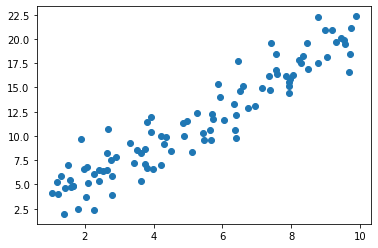

In [111]:
plt.scatter(data, targets)
plt.show()

Создаем тензоры PyTorch:

In [112]:
data = torch.from_numpy(data)
targets = torch.from_numpy(targets)

Перемещаем тензоры на GPU:

In [113]:
data = data.to(device)
targets = targets.to(device)

In [114]:
data[0]

tensor([4.3709], device='cuda:0')

Нарисуем предсказание модели со случайно инициализированными весами:

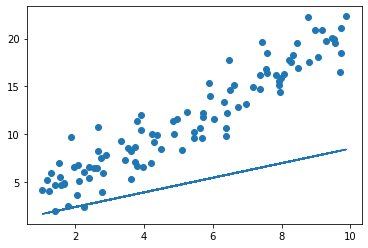

In [115]:
predictions = model(data)
plt.scatter(data.cpu().numpy(), targets.cpu().numpy())
plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy())
plt.show()

#### Обучение сети
Сначала задаем функцию потерь ([MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)):

In [116]:
loss_fn = nn.MSELoss()

Затем определим оптимизатор:

In [117]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Зададим функцию, определяющую действия в процессе одной эпохи обучения:

In [118]:
def train_loop(data, targets, model, loss_fn, optimizer):
    for i in range(len(data)):
        # Вычисляем предсказание модели на одном объекте
        pred = model(data[i])
        
        # Вычисляем функцию потерь
        loss = loss_fn(pred, targets[i])

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            print(f'loss: {loss}')

Запускаем цикл обучения:

In [119]:
epochs = 10
print_weights(model)
for t in range(epochs):
    print(f'-------------------------------\nEpoch {t+1}')
    train_loop(data, targets, model, loss_fn, optimizer)
    print()
    print_weights(model)

regr.weight = tensor([[0.7645]], device='cuda:0')
regr.bias = tensor([0.8300], device='cuda:0')
-------------------------------
Epoch 1
loss: 32.994876861572266
loss: 3.7130351066589355
loss: 7.4773125648498535
loss: 16.94472312927246
loss: 0.06362053751945496
loss: 20.94452667236328
loss: 11.095436096191406
loss: 22.48904800415039
loss: 25.47216033935547
loss: 0.9354173541069031

regr.weight = tensor([[2.0708]], device='cuda:0')
regr.bias = tensor([1.1238], device='cuda:0')
-------------------------------
Epoch 2
loss: 0.06721831113100052
loss: 3.390458583831787
loss: 7.715185165405273
loss: 17.09217071533203
loss: 0.09646038711071014
loss: 20.185867309570312
loss: 11.15341567993164
loss: 22.767791748046875
loss: 26.13392448425293
loss: 0.8385037779808044

regr.weight = tensor([[2.0542]], device='cuda:0')
regr.bias = tensor([1.1944], device='cuda:0')
-------------------------------
Epoch 3
loss: 0.06614411622285843
loss: 3.180938482284546
loss: 7.878329277038574
loss: 17.1922893524169

In [120]:
print_weights(model)

regr.weight = tensor([[2.0209]], device='cuda:0')
regr.bias = tensor([1.3356], device='cuda:0')


In [121]:
t = torch.tensor([0.0])
t = t.to(device)
pred = model(t)
pred

tensor([1.3356], device='cuda:0', grad_fn=<AddBackward0>)

---
Нарисуем получившуюся модель:

(0, 10)

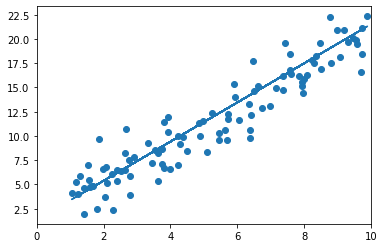

In [122]:
predictions = model(data)
plt.scatter(data.cpu().numpy(), targets.cpu().numpy())
plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy())
plt.xlim([0, 10])

**Задание**. Вычислите MSE для итоговой модели.

In [123]:
lossfn = nn.MSELoss(reduction='mean')
l = lossfn(predictions, targets)
#l.backward(retain_graph=True)
print(f'{l}')

3.5339627265930176


**Задание**. Выполните перебор гиперпараметров – скорости обучения и количества эпох (не менее пяти значений на каждый гиперпараметр) и найдите комбинацию, при которой достигается минимум MSE на обучающих данных.

In [124]:
def train_loop(data, targets, model, loss_fn, optimizer):
    for i in range(len(data)):
        # Вычисляем предсказание модели на одном объекте
        pred = model(data[i])
        
        # Вычисляем функцию потерь
        loss = loss_fn(pred, targets[i])

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [125]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15]
epochs = [1, 5, 10, 15, 20, 25]

In [126]:
best = {'learning_rate' : learning_rates[0], 'epoches' : epochs[0]}
b_loss = 100000
for le in learning_rates:
    for ep in epochs:
        model = NeuralNetwork()
        model.to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=le)
        for t in range(ep):
            train_loop(data, targets, model, loss_fn, optimizer)
        cur_loss = lossfn(model(data), targets)
        if cur_loss <= b_loss:
            b_loss = cur_loss
            best['learning_rate'] = le
            best['epoches'] = ep

print(best)
print(b_loss)

{'learning_rate': 0.005, 'epoches': 10}
tensor(3.2448, device='cuda:0', grad_fn=<MseLossBackward>)


### Линейная классификация в PyTorch

#### Генерация набора данных
Сгенерируем набор данных для классификации: объекты с меткой "0" будут нормально распределены вокруг точки (-1, -1),  объекты с меткой "1" – вокруг точки (1, 1):

In [127]:
n_samples = 100
half = int(n_samples / 2)
     
x_class0 = np.random.normal(size=[half, 2]) + [-1, -1]
y_class0 = np.zeros((half, 1))

x_class1 = np.random.normal(size=[half, 2]) + [1, 1]
y_class1 = np.ones((half, 1))

data = np.vstack([x_class0, x_class1])
targets = np.vstack([y_class0, y_class1])

In [128]:
data = data.astype(np.float32)
targets = targets.astype(np.float32)

In [129]:
print(len(data), len(targets))

100 100


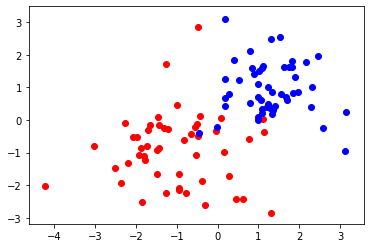

In [130]:
plt.scatter(x_class0[:, 0], x_class0[:, 1], c='red')
plt.scatter(x_class1[:, 0], x_class1[:, 1], c='blue')

In [131]:
data = torch.from_numpy(data)
targets = torch.from_numpy(targets)

In [132]:
data = data.to(device)
targets = targets.to(device)

#### Задание.
Постройте нейронную сеть – линейный классификатор и обучите её распознавать приведенный набор данных.  
*Подсказка*: в качестве функции потерь можно использовать Binary Cross Entropy ([BCELOSS](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).

In [133]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        self.regr = nn.Linear(2, 1)

    def forward(self, x):
        y = self.regr(x)
        return torch.sigmoid(y)

In [134]:
def train_loop(data, targets, model, loss_fn, optimizer):
    for i in range(len(data)):
        # Вычисляем предсказание модели на одном объекте
        pred = model(data[i]) 
        # Вычисляем функцию потерь
        loss = loss_fn(pred, targets[i])
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()   

In [135]:
model = NeuralNetwork2()
model.to(device)
model

NeuralNetwork2(
  (regr): Linear(in_features=2, out_features=1, bias=True)
)

In [136]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for t in range(10):
    train_loop(data, targets, model, loss_fn, optimizer)
cur_loss = loss_fn(model(data), targets)
print(cur_loss)

tensor(0.1909, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


In [160]:
print_weights(model)
weights = model.regr.weight.cpu().detach().numpy()[0]
w1 = weights[0]
w2 = weights[1]
b = model.regr.bias.item()
print(w1, w2, b)

regr.weight = tensor([[1.3699, 1.0186]], device='cuda:0')
regr.bias = tensor([-0.3089], device='cuda:0')
1.3698832 1.0185785 -0.30886998772621155


In [171]:
def line(x1, x2):
    return w1 * x1 + w2 * x2 + b

In [181]:
def line_x1(x1):
    return -(w1 * x1 - b) / w2

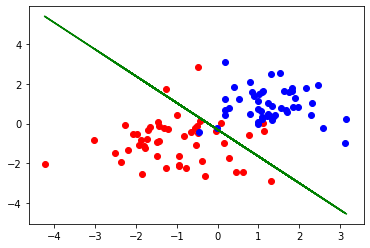

In [182]:
predictions = model(data)
plt.scatter(x_class0[:, 0], x_class0[:, 1], c='red')
plt.scatter(x_class1[:, 0], x_class1[:, 1], c='blue')
x1_range = data.cpu().detach().numpy()
plt.plot(x1_range, line_x1(x1_range), color='green')
#plt.scatter(data.cpu().numpy()[:, 0], targets.cpu().numpy()[:, 0], c='red')
#plt.scatter(data.cpu().numpy()[:, 1], targets.cpu().numpy()[:, 1], c='blue')
#plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy(), marker=".")

In [ ]:
print(data.shape)
print(targets.shape)

#### Задание (факультативное).
Прочитать параграф 2.6 в учебнике С. Николенко и др. (стр. 81–92) и воспроизвести рассмотренные там нейронные сети на TensorFlow и Keras.